In [6]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1
## Let's start by looking at the distribution of site visits by day. Build a plot showing the distribution of visits by bots and regular users of the Yandex.Metrica website.

In [7]:
# Loading site visit data from a CSV file  
website_visits_data_step_1= pd.read_csv('D:/курс_архив/my_files/lesson_7/step_1_lesson_7.csv')
website_visits_data_step_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


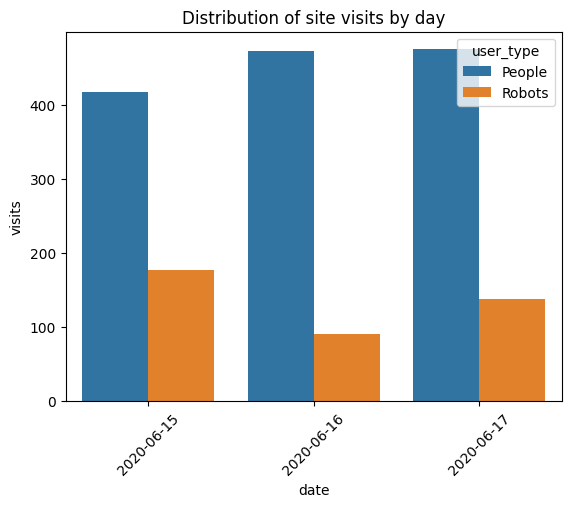

In [8]:
# Building a plot showing the distribution of visits by bots and regular users    
# 'x' — dates, 'y' — number of visits, 'hue' — user type (bots or people)
sns.barplot(x='date', y='visits', hue='user_type', data=website_visits_data_step_1)
# Customizing the plot for better data interpretation  
plt.title("Distribution of site visits by day")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

# Task 2  
## Determine the percentage of site visits in Yandex.Metrika made using the Google Chrome browser.  

### Round the answer to the nearest whole number.  

In [9]:
website_visits_data_step_2 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_2_lesson_7.csv')
website_visits_data_step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [10]:
website_visits_data_step_2['percent_%'] = ((website_visits_data_step_2.visits / website_visits_data_step_2.visits.sum()) * 100).round()
website_visits_data_step_2

,date,browser,visits,percent_%
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0
5,2020-06-15,Opera,16.0,3.0
6,2020-06-15,Mobile Safari,16.0,3.0
7,2020-06-15,Samsung Internet,9.0,2.0
8,2020-06-15,Edge,5.0,1.0
9,2020-06-15,UCWEB,4.0,1.0


# Answear: 60%

# Task 3  
## Find out which browser is used by the majority of bots. Look at the data and determine which browser has the highest share of bot visits relative to the total number of visits for that browser.  

In [11]:
website_visits_data_step_3 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_3_lesson_7.csv')
website_visits_data_step_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [12]:
# Grouping data by browser to calculate the total number of visits from each browser  
# `'visits': 'sum'` - summing up the number of visits for each browser  
total_visits_per_browser = website_visits_data_step_3.groupby(['browser']) \
    .agg({'visits': 'sum'})

In [13]:
# Merging visit data with bot information for each browser  
# The merge is performed on the `'browser'` column, adding bot visit information to the total visits  
full_merged_df  = website_visits_data_step_3.merge(total_visits_per_browser, on='browser', how='inner')
full_merged_df # Viewing the merged DataFrame  

,date,browser,user_type,visits_x,visits_y
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Firefox,Robots,31.0,58.0
4,2020-06-15,Chrome Mobile,People,31.0,31.0
5,2020-06-15,Firefox,People,27.0,58.0
6,2020-06-15,Safari,Robots,22.0,41.0
7,2020-06-15,Safari,People,19.0,41.0
8,2020-06-15,Mobile Safari,People,15.0,16.0
9,2020-06-15,Opera,People,11.0,16.0


In [14]:
# Calculating the percentage of visits by bots for each browser  
# Formula: (bot visits / total visits) * 100 
full_merged_df['percent'] = ((full_merged_df.visits_x / full_merged_df.visits_y) * 100).round(2)
full_merged_df.query('user_type == "Robots"') \
    .sort_values('percent', ascending=False)

,date,browser,user_type,visits_x,visits_y,percent
13,2020-06-15,UCWEB,Robots,4.0,4.0,100.00
6,2020-06-15,Safari,Robots,22.0,41.0,53.66
3,2020-06-15,Firefox,Robots,31.0,58.0,53.45
18,2020-06-15,Chromium,Robots,1.0,2.0,50.00
12,2020-06-15,Opera,Robots,5.0,16.0,31.25
1,2020-06-15,Google Chrome,Robots,104.0,354.0,29.38
21,2020-06-15,Edge,Robots,1.0,5.0,20.00
11,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.96
23,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.11
15,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.25


# Answear: "UCWEB"

# Task 4
## Download the data containing information about the day, user type, and browser. Create a column with the metric of site visits for each of these categories.

### In your answer, specify the percentage of site visits by real Safari users (not bots) rounded to 1 decimal place.

In [15]:
# Loading website visit data, including information on day, browser, and user type  
website_visits_data_step_4 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_4_lesson_7.csv')
website_visits_data_step_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [16]:
# Grouping data by date, browser, and user type, summing up the number of visits  
grouped_visits = website_visits_data_step_4.groupby(['date' ,'browser', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})
grouped_visits

,date,browser,user_type,visits
0,2020-06-15,Android Browser,People,1.0
1,2020-06-15,Chrome Mobile,People,31.0
2,2020-06-15,Chromium,People,1.0
3,2020-06-15,Chromium,Robots,1.0
4,2020-06-15,CocCoc,People,1.0
5,2020-06-15,Edge,People,4.0
6,2020-06-15,Edge,Robots,1.0
7,2020-06-15,Firefox,People,27.0
8,2020-06-15,Firefox,Robots,31.0
9,2020-06-15,Google Chrome,People,250.0


In [17]:
# Calculating the proportion of visits for each breakdown  
grouped_visits['visit_share_%'] = (grouped_visits.visits / grouped_visits.visits.sum() * 100).round(1)

In [18]:
# Filtering to find the percentage of real users' visits from the Safari browser  
safari_people_visits = grouped_visits.query('browser == "Safari" and user_type == "People"')
safari_people_visits # Displaying the result  

,date,browser,user_type,visits,visit_share_%
15,2020-06-15,Safari,People,19.0,3.2


# Answer: The percentage of site visits by real Safari users (not bots) is 3.2.

# Task 5
## Another analyst has already aggregated some data from the metrics. You need to combine efforts to generate the final report. Read additional data from Google Spreadsheet, merge your table from the previous step with the analyst's table, and calculate the number of visits per user (ratio of visits to users) by browser and the Robots/People values.

### In your answer, specify how many visits per unique user are made by bots using the Google Chrome browser (rounded to the nearest integer).

In [19]:
# Reading the data obtained in the previous step
step_4_df = pd.read_csv('D:/курс_архив/my_files/lesson_7/step4.csv')
step_4_df

,Unnamed: 0,date,browser,user_type,visits,percent
0,0,2020-06-15,Android Browser,People,1.0,0.2
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2
2,2,2020-06-15,Chromium,People,1.0,0.2
3,3,2020-06-15,Chromium,Robots,1.0,0.2
4,4,2020-06-15,CocCoc,People,1.0,0.2
5,5,2020-06-15,Edge,People,4.0,0.7
6,6,2020-06-15,Edge,Robots,1.0,0.2
7,7,2020-06-15,Firefox,People,27.0,4.5
8,8,2020-06-15,Firefox,Robots,31.0,5.2
9,9,2020-06-15,Google Chrome,People,250.0,42.1


In [20]:
# Reading additional data from another analyst from Google Spreadsheet
# Loading data through a request
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
# Converting the response into bytes and reading it as a CSV file
data = r.content

df = pd.read_csv(BytesIO(data))

In [21]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [22]:
# Merging the data from the other analyst and your table by date, browser, and user type
merged_df = step_4_df.merge(df, on=['date', 'browser', 'user_type'], how='inner')

In [23]:
merged_df

,Unnamed: 0,date,browser,user_type,visits,percent,users
0,0,2020-06-15,Android Browser,People,1.0,0.2,1.0
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0
2,2,2020-06-15,Chromium,People,1.0,0.2,1.0
3,3,2020-06-15,Chromium,Robots,1.0,0.2,1.0
4,4,2020-06-15,CocCoc,People,1.0,0.2,1.0
5,5,2020-06-15,Edge,People,4.0,0.7,4.0
6,6,2020-06-15,Edge,Robots,1.0,0.2,1.0
7,7,2020-06-15,Firefox,People,27.0,4.5,26.0
8,8,2020-06-15,Firefox,Robots,31.0,5.2,29.0
9,9,2020-06-15,Google Chrome,People,250.0,42.1,240.0


In [24]:
# Creating a new column where we calculate the number of visits per user (ratio of visits to users)
merged_df['visits_per_user'] = merged_df.visits / merged_df.users
merged_df

,Unnamed: 0,date,browser,user_type,visits,percent,users,visits_per_user
0,0,2020-06-15,Android Browser,People,1.0,0.2,1.0,1.000000
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.033333
2,2,2020-06-15,Chromium,People,1.0,0.2,1.0,1.000000
3,3,2020-06-15,Chromium,Robots,1.0,0.2,1.0,1.000000
4,4,2020-06-15,CocCoc,People,1.0,0.2,1.0,1.000000
5,5,2020-06-15,Edge,People,4.0,0.7,4.0,1.000000
6,6,2020-06-15,Edge,Robots,1.0,0.2,1.0,1.000000
7,7,2020-06-15,Firefox,People,27.0,4.5,26.0,1.038462
8,8,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.068966
9,9,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.041667


In [109]:
# Filtering data for the Google Chrome browser and Robots user type, and rounding the result
chrome_robots_visits_per_user = merged_df.query('browser == "Google Chrome" and user_type == "Robots"').round(0)
chrome_robots_visits_per_user

,Unnamed: 0,date,browser,user_type,visits,percent,users,new_column,visits_per_user
10,10,2020-06-15,Google Chrome,Robots,104.0,18.0,104.0,1.0,1.0


# Answear: 1